## Sales Dashboard


#### What happened since 2019?

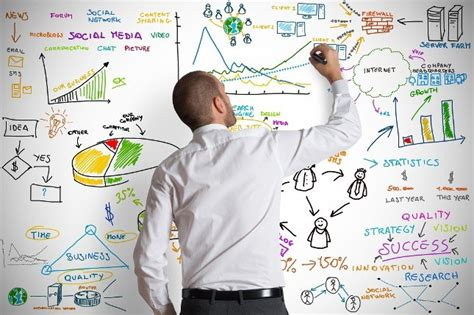

In [161]:
from IPython.display import Image
remote_image = Image('db.png')
display(remote_image)

In [162]:
# def hide_code_in_slideshow():   
#     from IPython import display
#     import binascii
#     import os
#     uid = binascii.hexlify(os.urandom(8)).decode()    
#     html = """<div id="%s"></div>
#     <script type="text/javascript">
#         $(function(){
#             var p = $("#%s");
#             if (p.length==0) return;
#             while (!p.hasClass("cell")) {
#                 p=p.parent();
#                 if (p.prop("tagName") =="body") return;
#             }
#             var cell = p;
#             cell.find(".input").addClass("hide-in-slideshow")
#         });
#     </script>""" % (uid, uid)
#     display.display_html(html, raw=True)

In [163]:
# !pip install pandas
# !pip install mysql-connector-python
# !pip install mysqltotsv
# !pip install pymysql
# !pip install ipython-sql
# !pip install matplotlib
# !pip install seaborn
# !pip install numpy
# !pip install scikit-surprise
# !pip install ipywidgets
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager
# !pip install pygal.maps.world
# !pip install plotly.express
# !pip install "notebook>=5.3" "ipywidgets>=7.5"
# !pip install plotly-geo==1.0.0
# !pip install plotly
# !pip install cufflinks
# !pip install requests pandas plotly chart-studio python-dotenv
# !pip install pycountry
# !pip install chart_studio
# !pip install mlxtend
# !pip install nltk
# !pip install pycountry-convert
# !pip install implicit
# !pip install lightfm
# !pip install mplcursors
# !pip install nbconvert
# !pip install RISE

In [164]:
import glob, os
import csv
import pandas as pd
import re
import mysql.connector
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import pygal
from pygal_maps_world.maps import World
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import cufflinks as cf
import plotly
import plotly.tools 
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default='notebook'
from collections import Counter
import datetime
from IPython.core.display import HTML
import time
from datetime import datetime, date, time, timedelta

In [165]:
# import warnings
# warnings.filterwarnings("ignore")

In [166]:
# hide_code_in_slideshow()
#id and pass for BtoB
user = 'readonly'
password = 'MwLvD9DFL8mnrTKkI6fU' 
host = '127.0.0.1'
port = 3335

In [167]:
conn = pymysql.connect(
    host=host,
    user=user,
    password=password,
    charset='utf8mb4',
    port=int(3335))
    #database=database,
    #port=int(3306))

cursor = conn.cursor()

In [168]:
#query SQL
#db = customers
#table = 'accounts'
query = """
SELECT i.sales_order_id, i.id AS id, i.quantity, i.product_id, i.state AS state_i, i.status, i.created_at, i.external_unit_price,
       p.id AS sku_id, p.sku, p.name, p.description, p.currency, p.brand_id, p.face_price, p.country, b.name AS name_i,
       o.date, o.invoice_number, o.state AS state_o, o.customer_company_id, c.id AS cust_id, c.name AS name_o, a.city, a.country AS country_o, x.finance_number, x.sales_order_id AS sales_order_id_o
        FROM (SELECT *
              FROM ezscm_production.sales_order_items
              WHERE created_at BETWEEN '2019-01-01' AND '2023-12-31') AS i
        LEFT OUTER JOIN (SELECT *
                         FROM ezscm_production.sales_orders
                         WHERE date BETWEEN '2019-01-01' AND '2023-12-31') AS o
            ON o.id = i.sales_order_id
        LEFT OUTER JOIN ezscm_production.products AS p
            ON p.id = i.product_id
        LEFT OUTER JOIN ezscm_production.brands AS b
            ON p.brand_id = b.id
        LEFT OUTER JOIN ezscm_production.companies AS c
            ON o.customer_company_id = c.id
        LEFT OUTER JOIN ezscm_production.addresses AS a
            ON c.billing_address_id = a.id
        LEFT OUTER JOIN ezscm_production.invoices AS x
            ON o.invoice_number = x.finance_number

"""

In [169]:
#connect cursor
cursor.execute(query)
rows = cursor.fetchall()

In [170]:
df = pd.read_sql(query,conn)
df.head(3)

/var/folders/jt/qpx02c196772_ytczgpv4llh0000gp/T/ipykernel_54201/2795003348.py:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



sales_order_id     id  quantity  product_id    state_i  status  \
0            2339  12478        10         109  fulfilled       0   
1            2339  12479         2         158  fulfilled       0   
2            2339  12480        15          85  fulfilled       0   

           created_at                  external_unit_price  sku_id  \
0 2019-01-02 12:49:45  {"amount": 4595, "currency": "USD"}     109   
1 2019-01-02 12:49:45  {"amount": 1800, "currency": "USD"}     158   
2 2019-01-02 12:49:45   {"amount": 485, "currency": "USD"}      85   

          sku                                       name  \
0  PSN50_1003         PlayStation Network Card $50 (USA)   
1    PSP3M_04  PlayStation Plus 3 Month Membership (CAN)   
2  STM05_1002                 Steam Wallet Card $5 (USA)   

                                 description currency  brand_id  face_price  \
0         PlayStation Network Card $50 (USA)      USD         3        50.0   
1  PlayStation Plus 3 Month Membership (CAN)      USD         3        25.0   
2                 Steam Wallet Card $5 (USA)      USD        11         5.0   

  country name_i        date invoice_number   state_o  customer_company_id  \
0      US   SONY  2019-01-02          14203  complete                107.0   
1      US   SONY  2019-01-02          14203  complete                107.0   
2      US  VALVE  2019-01-02          14203  complete                107.0   

   cust_id             name_o      city country_o finance_number  \
0    107.0  Global Deal d.o.o  Makarska        HR           None   
1    107.0  Global Deal d.o.o  Makarska        HR           None   
2    107.0  Global Deal d.o.o  Makarska        HR           None   

   sales_order_id_o  
0               NaN  
1               NaN  
2               NaN

In [171]:
df.to_csv('/Users/laetitiahoquetis/Downloads/Python/Dashboard/EZItotalFull.csv', index=False)

In [ ]:
# #query SQL
# #db = customers
# #table = 'accounts'
# query = """
# SELECT i.sales_order_id, i.id, i.quantity, i.product_id, i.state, i.status, i.created_at, i.external_unit_price,
#        p.id AS sku_id, p.sku, p.name, p.description, p.currency, p.brand_id, p.face_price, p.country, b.name,
#        o.date, o.invoice_number, o.state, o.customer_company_id, c.id AS id_o, c.name AS name_o, a.city, a.country, x.finance_number, x.sales_order_id AS sales_order_id_o
#         FROM (SELECT *
#               FROM ezscm_production.sales_order_items
#               WHERE created_at BETWEEN '2019-01-01' AND '2023-12-31') AS i
#         LEFT OUTER JOIN (SELECT *
#                          FROM ezscm_production.sales_orders
#                          WHERE date BETWEEN '2019-01-01' AND '2023-12-31') AS o
#             ON o.id = i.sales_order_id
#         LEFT OUTER JOIN ezscm_production.products AS p
#             ON p.id = i.product_id
#         LEFT OUTER JOIN ezscm_production.brands AS b
#             ON p.brand_id = b.id
#         LEFT OUTER JOIN ezscm_production.companies AS c
#             ON o.customer_company_id = c.id
#         LEFT OUTER JOIN ezscm_production.addresses AS a
#             ON c.billing_address_id = a.id
#         LEFT OUTER JOIN ezscm_production.invoices AS x
#             ON o.invoice_number = x.finance_number

# """

In [ ]:
# #connect cursor
# cursor.execute(query)
# rows = cursor.fetchall()
# df = pd.read_sql(query,conn)

In [ ]:
# df.to_csv('/Users/laetitiahoquetis/Downloads/Python/Dashboard/EZIitemsFull.csv', index=False)

In [ ]:
# #query SQL
# #db = customers
# #table = 'accounts'
# query = """
# SELECT o.id , o.date, o.invoice_number, o.state, o.customer_company_id, 
# c.id , c.name, a.city, a.country, x.finance_number, x.sales_order_id

# FROM ezscm_production.sales_orders as o
# JOIN ezscm_production.companies as c
# ON o.customer_company_id = c.id

# LEFT OUTER JOIN ezscm_production.addresses as a
# ON c.billing_address_id = a.id

# LEFT OUTER JOIN ezscm_production.invoices as x
# ON o.invoice_number = x.finance_number

# WHERE o.date BETWEEN '2019-01-01' AND '2023-12-31'
# """
# cursor.execute(query)
# rows = cursor.fetchall()

In [ ]:
# df1 = pd.read_sql(query,conn)
# df1.to_csv('/Users/laetitiahoquetis/Downloads/Python/Dashboard/EZIordersFull.csv', index=False)

In [172]:
df = pd.read_csv('EZItotalFull.csv')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = df.sort_index(ascending=True)
df.head(3)

/var/folders/jt/qpx02c196772_ytczgpv4llh0000gp/T/ipykernel_54201/1011444069.py:1: DtypeWarning:

Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.



sales_order_id     id  quantity  product_id    state_i  status  \
0            2339  12478        10         109  fulfilled       0   
1            2339  12479         2         158  fulfilled       0   
2            2339  12480        15          85  fulfilled       0   

            created_at                  external_unit_price  sku_id  \
0  2019-01-02 12:49:45  {"amount": 4595, "currency": "USD"}     109   
1  2019-01-02 12:49:45  {"amount": 1800, "currency": "USD"}     158   
2  2019-01-02 12:49:45   {"amount": 485, "currency": "USD"}      85   

          sku                                       name  \
0  PSN50_1003         PlayStation Network Card $50 (USA)   
1    PSP3M_04  PlayStation Plus 3 Month Membership (CAN)   
2  STM05_1002                 Steam Wallet Card $5 (USA)   

                                 description currency  brand_id  face_price  \
0         PlayStation Network Card $50 (USA)      USD         3        50.0   
1  PlayStation Plus 3 Month Membership (CAN)      USD         3        25.0   
2                 Steam Wallet Card $5 (USA)      USD        11         5.0   

  country name_i        date invoice_number   state_o  customer_company_id  \
0      US   SONY  2019-01-02          14203  complete                107.0   
1      US   SONY  2019-01-02          14203  complete                107.0   
2      US  VALVE  2019-01-02          14203  complete                107.0   

   cust_id             name_o      city country_o finance_number  \
0    107.0  Global Deal d.o.o  Makarska        HR            NaN   
1    107.0  Global Deal d.o.o  Makarska        HR            NaN   
2    107.0  Global Deal d.o.o  Makarska        HR            NaN   

   sales_order_id_o  
0               NaN  
1               NaN  
2               NaN

In [173]:
# #and
# df1 = pd.read_csv('EZIordersFull.csv')
# df1 = df1.sort_index(ascending=True)
# df1.head(3)

In [174]:
#clean by date for dfatabase
from datetime import datetime
df["date"] = pd.to_datetime(df['date'],format= '%Y-%m-%d').dt.date
df["created_at"] = pd.to_datetime(df['created_at'],format= '%Y-%m-%d').dt.date
len(df["created_at"].unique()), len(df["date"].unique()),

(1101, 1100)

In [175]:
len(df.sales_order_id), df.sales_order_id.nunique(),len(df.id), df.id.nunique()

(102100, 16912, 102100, 102100)

In [176]:
df = df.sort_values(['date','id'],ascending=[True, True])
df.head(3)

sales_order_id     id  quantity  product_id    state_i  status  created_at  \
0            2339  12478        10         109  fulfilled       0  2019-01-02   
1            2339  12479         2         158  fulfilled       0  2019-01-02   
2            2339  12480        15          85  fulfilled       0  2019-01-02   

                   external_unit_price  sku_id         sku  \
0  {"amount": 4595, "currency": "USD"}     109  PSN50_1003   
1  {"amount": 1800, "currency": "USD"}     158    PSP3M_04   
2   {"amount": 485, "currency": "USD"}      85  STM05_1002   

                                        name  \
0         PlayStation Network Card $50 (USA)   
1  PlayStation Plus 3 Month Membership (CAN)   
2                 Steam Wallet Card $5 (USA)   

                                 description currency  brand_id  face_price  \
0         PlayStation Network Card $50 (USA)      USD         3        50.0   
1  PlayStation Plus 3 Month Membership (CAN)      USD         3        25.0   
2                 Steam Wallet Card $5 (USA)      USD        11         5.0   

  country name_i        date invoice_number   state_o  customer_company_id  \
0      US   SONY  2019-01-02          14203  complete                107.0   
1      US   SONY  2019-01-02          14203  complete                107.0   
2      US  VALVE  2019-01-02          14203  complete                107.0   

   cust_id             name_o      city country_o finance_number  \
0    107.0  Global Deal d.o.o  Makarska        HR            NaN   
1    107.0  Global Deal d.o.o  Makarska        HR            NaN   
2    107.0  Global Deal d.o.o  Makarska        HR            NaN   

   sales_order_id_o  
0               NaN  
1               NaN  
2               NaN

In [177]:
#clean id to be exploitable
df.sales_order_id.fillna(df.id, inplace=True)

In [178]:
df.id = pd.to_numeric(df.id)
df.sales_order_id = pd.to_numeric(df.sales_order_id)

In [179]:
df.sales_order_id = pd.to_numeric(df.sales_order_id,downcast='integer', errors='ignore')

In [180]:
len(df), df.sales_order_id.nunique()

(102100, 16912)

Index(['sales_order_id', 'id', 'quantity', 'product_id', 'state_i', 'status',
       'created_at', 'external_unit_price', 'sku_id', 'sku', 'name',
       'description', 'currency', 'brand_id', 'face_price', 'country',
       'name_i', 'date', 'invoice_number', 'state_o', 'customer_company_id',
       'id_o', 'name_o', 'city', 'country_o', 'finance_number',
       'sales_order_id_o', 'price', 'total', 'year', 'month', 'day',
       'weekday'],
      dtype='object')

In [182]:
dfa = df

In [92]:
#merge the 2 datasets on id

In [93]:
# dfa= pd.merge(
#     df1,
#     df,
#     how="outer",
#     left_on=df1["id"],
#     right_on = df["sales_order_id"],
#     sort=True,
#     suffixes=("_o", "_i"),
#     copy=True,
#     indicator=True,
#     validate=None,
# )

In [94]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102051 entries, 105 to 102050
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   sales_order_id       102051 non-null  int16  
 1   id                   102051 non-null  int64  
 2   quantity             102051 non-null  int64  
 3   product_id           102051 non-null  int64  
 4   state_i              102051 non-null  object 
 5   status               102051 non-null  int64  
 6   created_at           102051 non-null  object 
 7   external_unit_price  102051 non-null  object 
 8   sku_id               102051 non-null  int64  
 9   sku                  102051 non-null  object 
 10  name                 102051 non-null  object 
 11  description          97583 non-null   object 
 12  currency             102051 non-null  object 
 13  brand_id             102051 non-null  int64  
 14  face_price           102051 non-null  float64
 15  country        

In [183]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
display.max_columns = None
display.max_rows = None
display.max_colwidth = None
display.width = None

In [184]:
dfa[pd.isnull(dfa['name_o'])].head()

sales_order_id     id  quantity  product_id    state_i  status  \
24682            1368  37181       110         124  fulfilled       0   
24784            1370  37283        20         124  fulfilled       0   
24785            1363  37284       100         124  fulfilled       0   
24786            1379  37285       100         124  fulfilled       0   
24787            1404  37286        20         124  fulfilled       0   

       created_at                  external_unit_price  sku_id        sku  \
24682  2020-01-13  {"amount": 4525, "currency": "USD"}     124  XB50_1001   
24784  2020-01-14  {"amount": 4525, "currency": "USD"}     124  XB50_1001   
24785  2020-01-14  {"amount": 4525, "currency": "USD"}     124  XB50_1001   
24786  2020-01-14  {"amount": 4525, "currency": "USD"}     124  XB50_1001   
24787  2020-01-14  {"amount": 4525, "currency": "USD"}     124  XB50_1001   

                 name     description currency  brand_id  face_price country  \
24682  XBOX $50 (USA)  XBOX $50 (USA)      USD         4        50.0      US   
24784  XBOX $50 (USA)  XBOX $50 (USA)      USD         4        50.0      US   
24785  XBOX $50 (USA)  XBOX $50 (USA)      USD         4        50.0      US   
24786  XBOX $50 (USA)  XBOX $50 (USA)      USD         4        50.0      US   
24787  XBOX $50 (USA)  XBOX $50 (USA)      USD         4        50.0      US   

          name_i date invoice_number state_o  customer_company_id  cust_id  \
24682  MICROSOFT  NaT            NaN     NaN                  NaN      NaN   
24784  MICROSOFT  NaT            NaN     NaN                  NaN      NaN   
24785  MICROSOFT  NaT            NaN     NaN                  NaN      NaN   
24786  MICROSOFT  NaT            NaN     NaN                  NaN      NaN   
24787  MICROSOFT  NaT            NaN     NaN                  NaN      NaN   

      name_o city country_o finance_number  sales_order_id_o  
24682    NaN  NaN       NaN            NaN               NaN  
24784    NaN  NaN       NaN            NaN               NaN  
24785    NaN  NaN       NaN            NaN               NaN  
24786    NaN  NaN       NaN            NaN               NaN  
24787    NaN  NaN       NaN            NaN               NaN

In [185]:
len(dfa[dfa['city'].isna()])

11182

In [98]:
#dropping the 30 rows that have not been merged, they all are part of an order of microsoft Xbox 50 on jan 14th 2020

In [ ]:
dfa['_merge'].value_counts()

In [ ]:
#excluding the rows that do not contain customer data
dfa = dfa[dfa._merge == 'both']
len(dfa)

In [ ]:
dfa.head()

In [186]:
#cleaning date to be exploitable
dfa["date"] = pd.to_datetime(dfa['date'],format= '%Y-%m-%d').dt.date
dfa["created_at"] = pd.to_datetime(dfa['created_at'],format= '%Y-%m-%d').dt.date
dfa = dfa.sort_values(by='date')

In [188]:
#cleaning other columns to be exploitable
#dfa['Unnamed: 0_o'] = pd.to_numeric(dfa['Unnamed: 0_o'], downcast="integer") 
dfa['sales_order_id'] = pd.to_numeric(dfa['sales_order_id'], downcast="integer") 
dfa['customer_company_id'] = pd.to_numeric(dfa['customer_company_id'], downcast="integer") 
#dfa['id.1_o'] = pd.to_numeric(dfa['id.1_o'], downcast="integer") 
dfa['sales_order_id_o'] = pd.to_numeric(dfa['sales_order_id_o'], downcast="integer") 
#dfa['Unnamed: 0_i'] = pd.to_numeric(dfa['Unnamed: 0_i'], downcast="integer") 
#dfa['sales_order_id_i'] = pd.to_numeric(dfa['sales_order_id_i'], downcast="integer") 
#dfa['id_i'] = pd.to_numeric(dfa['id_i'], downcast="integer") 
dfa['quantity'] = pd.to_numeric(dfa['quantity'], downcast="integer") 
dfa['product_id'] = pd.to_numeric(dfa['product_id'], downcast="integer") 
#dfa['id.1_i'] = pd.to_numeric(dfa['id.1_i'], downcast="integer") 

In [190]:
dfa = dfa.sort_values(['date','sales_order_id'],ascending=[True, True])

In [ ]:
#creating more data 

In [191]:
#creating a column that states clearly the unit price in a clean way : currency and price
dfa['currency']= dfa['external_unit_price'].apply(lambda x: x[-5:-2])
dfa['price'] = dfa['external_unit_price'].str.extractall('(\d+)').unstack().loc[:,0]
dfa['price'] = pd.to_numeric(dfa['price'], downcast='float')
dfa['price'] = dfa['price']/100
dfa['price'] = round(dfa['price'], 2)

In [192]:
#creating a order value column : quantity * price
dfa['total'] = dfa['quantity']*dfa['price']
dfa['total'] = round(dfa['total'],2)

In [193]:
#splitting date into month, and day
dfa["date"] = dfa["date"].astype('datetime64[ns]')
dfa['year'] = dfa.date.dt.year
dfa['month'] = dfa.date.dt.month
dfa['day'] = dfa.date.dt.day
dfa['weekday'] = dfa.date.dt.day_name()

In [194]:
dfa.to_csv('EZItotalFull.csv',index=False)

In [111]:
dfa.columns

Index(['sales_order_id', 'id', 'quantity', 'product_id', 'state_i', 'status',
       'created_at', 'external_unit_price', 'sku_id', 'sku', 'name',
       'description', 'currency', 'brand_id', 'face_price', 'country',
       'name_i', 'date', 'invoice_number', 'state_o', 'customer_company_id',
       'id_o', 'name_o', 'city', 'country_o', 'finance_number',
       'sales_order_id_o', 'price', 'total', 'year', 'month', 'day',
       'weekday'],
      dtype='object')

In [112]:
dfa.state_o.head()

0    complete
1    complete
2    complete
3    complete
4    complete
Name: state_o, dtype: object

### Percentage of not "completed" orders do we have?

In [113]:
# dfa = pd.read_csv('EZItotalFull.csv')
# dfa["date"] = pd.to_datetime(dfa['date'],format= '%Y-%m-%d').dt.date
# dfa["date"] = dfa["date"].astype('datetime64[ns]')
# dfa.info()

## START

In [114]:
#what percentage of not complete orders do we have
unsuccess = dfa[dfa['state_o']!='complete']
unsuccess.groupby('name_o').agg({'quantity':'count','total':'sum'}).sort_values(by='quantity', ascending= False).head(5)

quantity          total
name_o                                                 
MyGiftCardSupply                      74   65029.621094
OffGamers Global Pte Ltd (USD)        71  292770.687500
Onequark SPA                          58  139945.093750
ABAAD ALJEEL DBA LIKE4CARD            52  509952.093750
VERVE MULTIMEDIA INC                  48  209598.250000

In [115]:
print("Over the past 4 years :",round(len(unsuccess)/len(dfa)*100,2),"%")

Over the past 4 years : 1.04 %


In [116]:
print("What other status do we have?\n\n",dfa['state_o'].value_counts(normalize=True))

What other status do we have?

 complete            0.989924
deleted             0.007038
cancelled           0.001304
fulfilling          0.000637
awaiting_invoice    0.000480
back_order          0.000255
reserved            0.000216
draft               0.000147
Name: state_o, dtype: float64


In [117]:
#let's take ONLY the COMPLETED orders
df = dfa[dfa['state_o']=='complete']

In [118]:
#total number of orders and #total number of items 
df.sales_order_id.nunique(), df.id.nunique()

(16592, 100993)

### Up to Date Numbers

In [119]:
yearly_sales = df.resample(on="date", rule="1Y").total.sum().rename("This_year").reset_index()
yearly_sales

date   This_year
0 2019-12-31  65936508.0
1 2020-12-31  93536824.0
2 2021-12-31  83759000.0
3 2022-12-31  70858840.0
4 2023-12-31  17861872.0

In [120]:
current_year = yearly_sales["date"].dt.year.max()

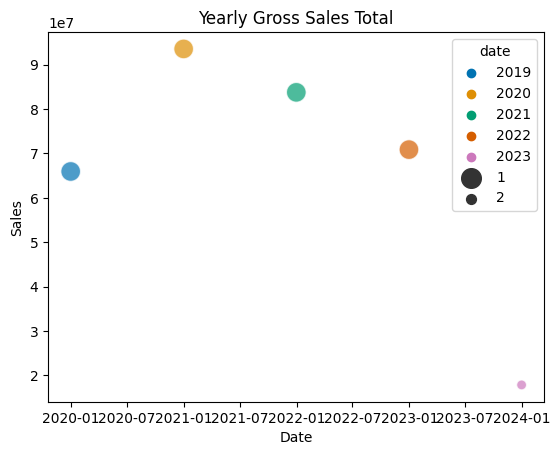

In [121]:
# hide_code_in_slideshow()
# Plot the total sales with different colors for each year
sns.scatterplot(data=yearly_sales, x="date", y="This_year",
                hue=yearly_sales["date"].dt.year, palette="colorblind",
                size=yearly_sales["date"].dt.year.map(lambda y: 2 if y == current_year else 1),
                sizes=[200, 50], alpha=0.7)
plt.title('Yearly Gross Sales Total')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

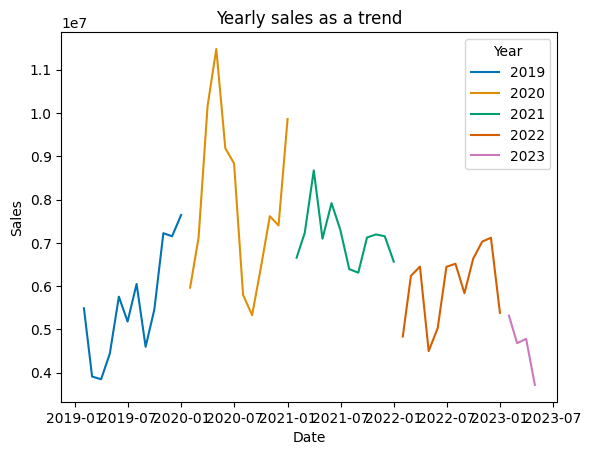

In [122]:
# hide_code_in_slideshow()
#monthly sales
monthly_sales = dfa.resample(on="date", rule="1M").total.sum().rename("This_month").reset_index()
# Extract the year from the date column
monthly_sales["Year"] = monthly_sales["date"].dt.year
# Plot the monthly sales with one color per year
sns.lineplot(data=monthly_sales, x="date", y="This_month", hue="Year", palette="colorblind")
plt.title('Yearly sales as a trend')
plt.xlabel('Date')
plt.ylabel('Sales')
import mplcursors
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Year: {sel.target[0].year}\nMonth: {sel.target[0].strftime('%B %Y')}\nSales: {sel.target[1]:,.2f}"))
plt.show()

### Can we spot seasonality?

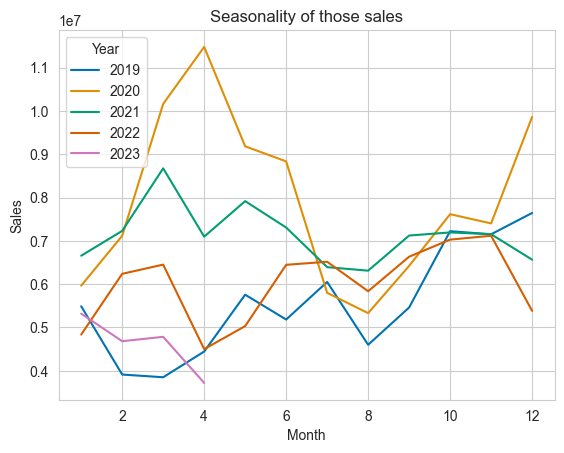

In [123]:
# hide_code_in_slideshow()
monthly_sales = dfa.resample(on="date", rule="1M").total.sum().rename("This_month").reset_index()
monthly_sales["Year"] = monthly_sales["date"].dt.year
monthly_sales["Month"] = monthly_sales["date"].dt.month

sns.set_style("whitegrid")
plot = sns.lineplot(data=monthly_sales, x="Month", y="This_month", hue="Year", palette="colorblind", errorbar=None, estimator=sum)
plt.title('Seasonality of those sales')
plt.xlabel('Month')
plt.ylabel('Sales')
cursor = mplcursors.cursor(plot)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Year:{sel.artist.get_label()}\nMonth:{sel.target[0]:.0f}\nSales:{sel.target[1]:,.0f}"))
plt.show()

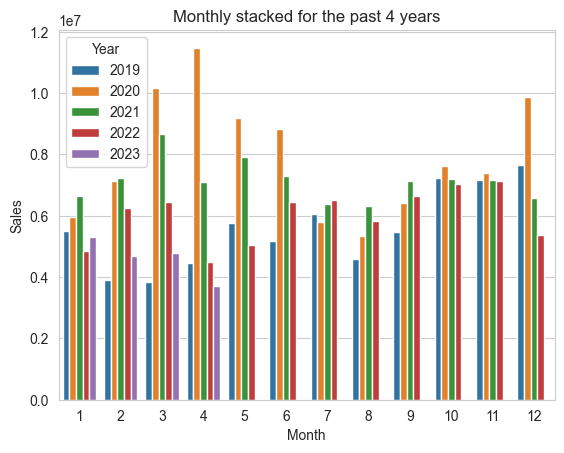

In [124]:
# hide_code_in_slideshow()
sns.barplot(x = "Month", y = "This_month", hue = "Year", data = monthly_sales)
plt.title('Monthly stacked for the past 4 years')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [125]:
monthly_sales.head()

date  This_month  Year  Month
0 2019-01-31   5487615.5  2019      1
1 2019-02-28   3911795.0  2019      2
2 2019-03-31   3848868.0  2019      3
3 2019-04-30   4443242.5  2019      4
4 2019-05-31   5755770.0  2019      5

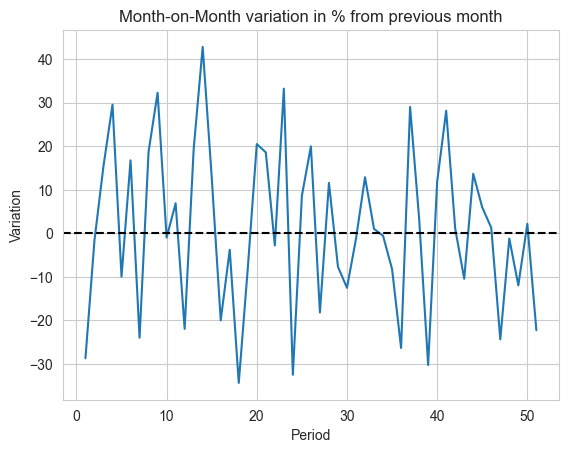

In [126]:
# hide_code_in_slideshow()
#variation MoM
monthly_sales['Variation'] = monthly_sales['This_month'].diff() / monthly_sales['This_month'].shift() * 100
sns.lineplot(data=monthly_sales['Variation'])
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Month-on-Month variation in % from previous month')
plt.xlabel('Period')
plt.ylabel('Variation')
plt.show()

In [127]:
print("Variations MoM :\n\n",monthly_sales[monthly_sales['Variation']<=0].sort_values('Variation').head(10))

Variations MoM :

          date  This_month  Year  Month  Variation
18 2020-07-31  5798037.00  2020      7 -34.368725
24 2021-01-31  6656041.00  2021      1 -32.495815
39 2022-04-30  4498764.00  2022      4 -30.257019
1  2019-02-28  3911795.00  2019      2 -28.715940
36 2022-01-31  4834836.00  2022      1 -26.350460
47 2022-12-31  5382629.00  2022     12 -24.369278
7  2019-08-31  4598657.50  2019      8 -23.992235
51 2023-04-30  3718065.25  2023      4 -22.257439
12 2020-01-31  5964153.50  2020      1 -21.966791
16 2020-05-31  9182609.00  2020      5 -19.997782


In [128]:
df.head()

sales_order_id     id  quantity  product_id    state_i  status  created_at  \
0            2345  12563       200         114  fulfilled       0  2019-01-02   
1            2345  12533        50         124  fulfilled       0  2019-01-02   
2            2345  12531        50         120  fulfilled       0  2019-01-02   
3            2345  12532       100         122  fulfilled       0  2019-01-02   
4            2345  12530       100         118  fulfilled       0  2019-01-02   

                   external_unit_price  sku_id          sku  \
0  {"amount": 9500, "currency": "USD"}     114  GOP100_1001   
1  {"amount": 4520, "currency": "USD"}     124    XB50_1001   
2  {"amount": 1390, "currency": "USD"}     120    XB15_1001   
3  {"amount": 2265, "currency": "USD"}     122    XB25_1001   
4   {"amount": 930, "currency": "USD"}     118    XB10_1001   

                     name             description currency  brand_id  \
0  Google Play $100 (USA)  Google Play $100 (USA)      USD         1   
1          XBOX $50 (USA)          XBOX $50 (USA)      USD         4   
2          XBOX $15 (USA)          XBOX $15 (USA)      USD         4   
3          XBOX $25 (USA)          XBOX $25 (USA)      USD         4   
4          XBOX $10 (USA)          XBOX $10 (USA)      USD         4   

   face_price country     name_i       date invoice_number   state_o  \
0       100.0      US     GOOGLE 2019-01-02          14189  complete   
1        50.0      US  MICROSOFT 2019-01-02          14189  complete   
2        15.0      US  MICROSOFT 2019-01-02          14189  complete   
3        25.0      US  MICROSOFT 2019-01-02          14189  complete   
4        10.0      US  MICROSOFT 2019-01-02          14189  complete   

   customer_company_id  id_o                  name_o      city country_o  \
0                  6.0   6.0  Sea Gamer Mall Sdn Bhd  Sitiawan        MY   
1                  6.0   6.0  Sea Gamer Mall Sdn Bhd  Sitiawan        MY   
2                  6.0   6.0  Sea Gamer Mall Sdn Bhd  Sitiawan        MY   
3                  6.0   6.0  Sea Gamer Mall Sdn Bhd  Sitiawan        MY   
4                  6.0   6.0  Sea Gamer Mall Sdn Bhd  Sitiawan        MY   

  finance_number  sales_order_id_o      price    total    year  month  day  \
0            NaN               NaN  95.000000  19000.0  2019.0    1.0  2.0   
1            NaN               NaN  45.200001   2260.0  2019.0    1.0  2.0   
2            NaN               NaN  13.900000    695.0  2019.0    1.0  2.0   
3            NaN               NaN  22.650000   2265.0  2019.0    1.0  2.0   
4            NaN               NaN   9.300000    930.0  2019.0    1.0  2.0   

     weekday  
0  Wednesday  
1  Wednesday  
2  Wednesday  
3  Wednesday  
4  Wednesday

### SALES MtD - YtD - o/n - vs previous year 

In [129]:
#MtD
from dateutil.relativedelta import relativedelta
now = pd.Timestamp.now()
current_day = pd.Timestamp.now().day
current_month = pd.Timestamp.now().month
current_year = pd.Timestamp.now().year
prev_year = current_year - 1
prev_month = (pd.Timestamp.now() - relativedelta(months=1)).month
two_year = current_year - 2

In [130]:
# hide_code_in_slideshow()
sales_mtd = df[(df['month'] == current_month)&(df['year'] == current_year)]['total'].sum()
sales_mtd_last_year = df[(df['month'] == current_month)&(df['year'] == prev_year)]['total'].sum()
sales_mtd_two_year = df[(df['month'] == current_month)&(df['year'] == two_year)]['total'].sum()
percent_vs_last_year_month = sales_mtd/sales_mtd_last_year
percent_vs_two_year_month = sales_mtd/sales_mtd_two_year

In [131]:
print("Month-to-Date"), print("Sales Amount MtD = ",sales_mtd), print("Pct done vs same month last year = ",percent_vs_last_year_month*100), print("Pct done vs 2 years ago = ",percent_vs_two_year_month*100)

Month-to-Date
Sales Amount MtD =  3237445.0
Pct done vs same month last year =  72.64316082000732
Pct done vs 2 years ago =  46.17530703544617


(None, None, None, None)

<BarContainer object of 3 artists>

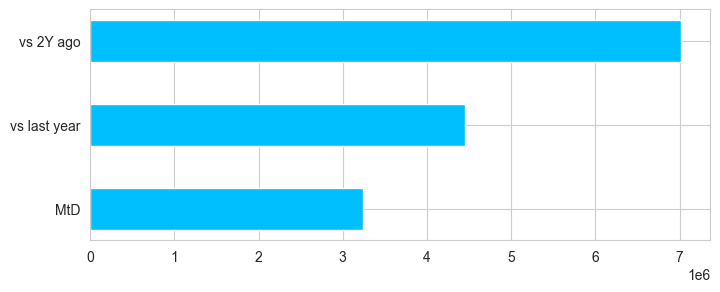

In [132]:
fig, ax = plt.subplots(figsize=(8, 3))
labels = ['MtD','vs last year','vs 2Y ago']
category_names = [sales_mtd, sales_mtd_last_year, sales_mtd_two_year]
ax.barh(labels,category_names, height=0.5, left=None, align='center', color = 'deepskyblue')

In [133]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = percent_vs_last_year_month*100,
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "% of MtD vs past year sales"}))

fig.show()

In [134]:
# hide_code_in_slideshow()
# Calculate the YtD for this year
ytd_start = pd.to_datetime(f"{current_year}-01-01")
last_ytd_start = pd.to_datetime(f"{prev_year}-01-01")
last_ytd_end = pd.to_datetime(f"{prev_year}-{current_month}-{current_day}")
two_ytd_start = pd.to_datetime(f"{two_year}-01-01")
two_ytd_end = pd.to_datetime(f"{two_year}-{current_month}-{current_day}")

sales_ytd = df[(df['date'] >= ytd_start)]['total'].sum()
sales_ytd_last_year = df[(df['date'] >=last_ytd_start)& (df['date'] <= last_ytd_end)]['total'].sum()
sales_ytd_two_year = df[(df['date'] >=two_ytd_start)& (df['date'] <= two_ytd_end)]['total'].sum()
percent_vs_last_year_to_date = sales_ytd/sales_ytd_last_year
percent_vs_two_year_to_date = sales_ytd/sales_ytd_two_year 

In [135]:
print("Year-to-Date"), print("Sales Amount YtD = ", sales_ytd) , print("Pct done vs same time last year = ", percent_vs_last_year_to_date), print("Pct done vs 2 year ago = ", percent_vs_two_year_to_date)

Year-to-Date
Sales Amount YtD =  17861872.0
Pct done vs same time last year =  0.8697558
Pct done vs 2 year ago =  0.64456004


(None, None, None, None)

In [136]:
# hide_code_in_slideshow()
# Calculate sales from previous workday day to today (overnight)
from datetime import datetime
today = pd.Timestamp.now().floor('D')
def prev_weekday(adate):
    adate -= timedelta(days=1)
    while adate.weekday() > 4: # Mon-Fri are 0-4
        adate -= timedelta(days=1)
    return adate

overnight_sales = dfa[(dfa['date'] >= prev_weekday(today))]['total'].sum()


In [137]:
print("Overnight Orders, including not Complete"), print("Overnight sales = ", overnight_sales)

Overnight Orders, including not Complete
Overnight sales =  271157.16


(None, None)

### For how long have the customers been with us?

In [138]:
df['prev_order_date'] = df.groupby('sales_order_id_o')['date'].shift(1)

In [139]:
df[df['name_o'] == 'Global Deal d.o.o'].tail()

sales_order_id     id  quantity  product_id    state_i  status  \
63172           12536  75728        15         320  fulfilled       0   
63173           12536  75729        77        1074  fulfilled       0   
63174           12536  75730        15         108  fulfilled       0   
63175           12536  75732         2        1072  fulfilled       0   
63176           12536  75725        85        1071  fulfilled       0   

       created_at                  external_unit_price  sku_id         sku  \
63172  2021-07-02  {"amount": 1835, "currency": "USD"}     320  PSN20_1005   
63173  2021-07-02  {"amount": 1835, "currency": "USD"}    1074       PSN20   
63174  2021-07-02  {"amount": 4555, "currency": "USD"}     108  PSN50_1002   
63175  2021-07-02  {"amount": 9150, "currency": "USD"}    1072      PSN100   
63176  2021-07-02   {"amount": 920, "currency": "USD"}    1071       PSN10   

                                      name  \
63172   PlayStation Network Card $20 (USA)   
63173   PlayStation Network Card $20 (USA)   
63174   PlayStation Network Card $50 (USA)   
63175  PlayStation Network Card $100 (USA)   
63176   PlayStation Network Card $10 (USA)   

                               description currency  brand_id  face_price  \
63172   PlayStation Network Card $20 (USA)      USD         3        20.0   
63173   PlayStation Network Card $20 (USA)      USD         3        20.0   
63174   PlayStation Network Card $50 (USA)      USD         3        50.0   
63175  PlayStation Network Card $100 (USA)      USD         3       100.0   
63176   PlayStation Network Card $10 (USA)      USD         3        10.0   

      country name_i       date invoice_number   state_o  customer_company_id  \
63172      US   SONY 2021-07-02          25751  complete                107.0   
63173      US   SONY 2021-07-02          25751  complete                107.0   
63174      US   SONY 2021-07-02          25751  complete                107.0   
63175      US   SONY 2021-07-02          25751  complete                107.0   
63176      US   SONY 2021-07-02          25751  complete                107.0   

        id_o             name_o      city country_o finance_number  \
63172  107.0  Global Deal d.o.o  Makarska        HR            NaN   
63173  107.0  Global Deal d.o.o  Makarska        HR            NaN   
63174  107.0  Global Deal d.o.o  Makarska        HR            NaN   
63175  107.0  Global Deal d.o.o  Makarska        HR            NaN   
63176  107.0  Global Deal d.o.o  Makarska        HR            NaN   

       sales_order_id_o      price        total    year  month  day weekday  \
63172               NaN  18.350000   275.250000  2021.0    7.0  2.0  Friday   
63173               NaN  18.350000  1412.949951  2021.0    7.0  2.0  Friday   
63174               NaN  45.549999   683.250000  2021.0    7.0  2.0  Friday   
63175               NaN  91.500000   183.000000  2021.0    7.0  2.0  Friday   
63176               NaN   9.200000   782.000000  2021.0    7.0  2.0  Friday   

      prev_order_date  
63172             NaT  
63173             NaT  
63174             NaT  
63175             NaT  
63176             NaT

In [140]:
# hide_code_in_slideshow()
#How long have we got each cust 
customer_length = df.groupby('name_o').agg({'sales_order_id_o': 'nunique','date': ['min', 'max']})
customer_length['longevity'] = customer_length['date']['max'] - customer_length['date']['min']
customer_length

sales_order_id_o       date  \
                                                     nunique        min   
name_o                                                                    
24 Games ApS                                              41 2019-02-08   
2Life Pte Ltd                                              0 2019-02-04   
ABAAD ALJEEL DBA LIKE4CARD                                32 2019-01-03   
ABAAD ALJEEL DBA LIKE4CARD (CAD)                          11 2020-10-07   
ABAAD ALJEEL DBA LIKE4CARD (EUR)                           4 2021-01-04   
ARB Souza Junior Informatica                               0 2021-11-10   
ASIA DIGITAL PTE. LTD.                                    20 2019-02-21   
Alfadia Alalamiya General Trading Co.                      0 2020-01-27   
Anas Al-Shaar                                              0 2019-01-07   
Appeeku Productions                                        0 2019-06-18   
BANANA INTERNATIONAL LTD                                   0 2019-01-11   
BASATNE INTERNATIONAL LLC                                220 2021-03-17   
BGC Digital                                                0 2019-10-30   
BNB CARD CO. LTD                                          47 2019-01-02   
BOLIVIA CARDS                                              0 2019-03-18   
Bamboo Card LLC                                           28 2020-06-12   
Betkat Co. For Trading                                     0 2020-03-19   
BigKidGaming Ltd                                           0 2019-04-30   
Bogdan Vlase                                               2 2022-05-08   
Brandizer (Future Technology Solutions)                    2 2019-01-03   
C2GAMES                                                    3 2019-01-28   
CEDAR PARK SALES LLC                                      48 2019-01-03   
CIRCUIT ZONE CANADA                                        0 2021-09-28   
CIRCUIT ZONE LTD                                           4 2019-08-20   
COLOMBIANUP SAS                                           14 2021-08-24   
CY. TALK SWITZERLAND SA (EUR.)                             1 2021-11-10   
CY. TALK SWITZERLAND SA (USD)                              0 2019-09-20   
Cal Micro                                                  0 2019-01-02   
Comercializadora SYP Limitada                              8 2020-05-18   
Comercializadora SYP Limitada (EUR)                        3 2020-10-07   
ContentCard AG                                            20 2019-07-03   
Cybernus, Llc                                              0 2021-01-25   
DEIMAN UNITED LTD                                         22 2019-01-07   
DEVCO FZ LLC                                              12 2023-02-28   
DIGITAL CODES S.p. Z.o.o (EUR.)                            1 2020-09-01   
DIGITAL CODES S.p. Z.o.o (GBP.)                           17 2020-09-01   
DIGITAL CODES S.p. Z.o.o (USD.)                           59 2019-01-07   
DIGITAL GOODS INC                                          0 2021-11-15   
DISTRITECH LLC                                             1 2023-02-27   
Doctors Gaming Alpha                                       0 2020-01-30   
Dorah For Digital Products                                 3 2020-03-17   
E3 DISTRIBUTION PTE LTD                                    0 2019-05-10   
EASY GATE PREPAID CARD MANAGEMENT SERVICES                 0 2019-09-19   
EZ CARDS                                                   5 2019-04-05   
EZ Cards Distribution LLC                                  4 2019-02-21   
EZ GAMES DISTRIBUTION INC.                                 0 2022-03-29   
EZ PAY CARDS FZ LLC                                       11 2019-01-14   
ExcelGames Interactive Pte Ltd                             5 2019-03-19   
FJENTERPRISE                                               0 2019-01-02   
Ferdioni Games                                             0 2019-02-11   
Florida State Games                                        0 2019-01-

In [141]:
print("Average longevity of our clients since 2019: ",customer_length.longevity.mean())

Average longevity of our clients since 2019:  732 days 13:30:32.335329344


In [142]:
# hide_code_in_slideshow()
#How long have we got each cust 
customer_snapshot = df.groupby('name_o').agg({'sales_order_id_o': 'nunique','date': ['min', 'max'],'total':'mean'})
customer_snapshot

sales_order_id_o       date  \
                                                     nunique        min   
name_o                                                                    
24 Games ApS                                              41 2019-02-08   
2Life Pte Ltd                                              0 2019-02-04   
ABAAD ALJEEL DBA LIKE4CARD                                32 2019-01-03   
ABAAD ALJEEL DBA LIKE4CARD (CAD)                          11 2020-10-07   
ABAAD ALJEEL DBA LIKE4CARD (EUR)                           4 2021-01-04   
ARB Souza Junior Informatica                               0 2021-11-10   
ASIA DIGITAL PTE. LTD.                                    20 2019-02-21   
Alfadia Alalamiya General Trading Co.                      0 2020-01-27   
Anas Al-Shaar                                              0 2019-01-07   
Appeeku Productions                                        0 2019-06-18   
BANANA INTERNATIONAL LTD                                   0 2019-01-11   
BASATNE INTERNATIONAL LLC                                220 2021-03-17   
BGC Digital                                                0 2019-10-30   
BNB CARD CO. LTD                                          47 2019-01-02   
BOLIVIA CARDS                                              0 2019-03-18   
Bamboo Card LLC                                           28 2020-06-12   
Betkat Co. For Trading                                     0 2020-03-19   
BigKidGaming Ltd                                           0 2019-04-30   
Bogdan Vlase                                               2 2022-05-08   
Brandizer (Future Technology Solutions)                    2 2019-01-03   
C2GAMES                                                    3 2019-01-28   
CEDAR PARK SALES LLC                                      48 2019-01-03   
CIRCUIT ZONE CANADA                                        0 2021-09-28   
CIRCUIT ZONE LTD                                           4 2019-08-20   
COLOMBIANUP SAS                                           14 2021-08-24   
CY. TALK SWITZERLAND SA (EUR.)                             1 2021-11-10   
CY. TALK SWITZERLAND SA (USD)                              0 2019-09-20   
Cal Micro                                                  0 2019-01-02   
Comercializadora SYP Limitada                              8 2020-05-18   
Comercializadora SYP Limitada (EUR)                        3 2020-10-07   
ContentCard AG                                            20 2019-07-03   
Cybernus, Llc                                              0 2021-01-25   
DEIMAN UNITED LTD                                         22 2019-01-07   
DEVCO FZ LLC                                              12 2023-02-28   
DIGITAL CODES S.p. Z.o.o (EUR.)                            1 2020-09-01   
DIGITAL CODES S.p. Z.o.o (GBP.)                           17 2020-09-01   
DIGITAL CODES S.p. Z.o.o (USD.)                           59 2019-01-07   
DIGITAL GOODS INC                                          0 2021-11-15   
DISTRITECH LLC                                             1 2023-02-27   
Doctors Gaming Alpha                                       0 2020-01-30   
Dorah For Digital Products                                 3 2020-03-17   
E3 DISTRIBUTION PTE LTD                                    0 2019-05-10   
EASY GATE PREPAID CARD MANAGEMENT SERVICES                 0 2019-09-19   
EZ CARDS                                                   5 2019-04-05   
EZ Cards Distribution LLC                                  4 2019-02-21   
EZ GAMES DISTRIBUTION INC.                                 0 2022-03-29   
EZ PAY CARDS FZ LLC                                       11 2019-01-14   
ExcelGames Interactive Pte Ltd                             5 2019-03-19   
FJENTERPRISE                                               0 2019-01-02   
Ferdioni Games                                             0 2019-02-11   
Florida State Games                                        0 2019-01-

In [143]:
print("Average $ spent over all periods ",customer_snapshot['total'].mean())

Average $ spent over all periods  mean    4459.183594
dtype: float32


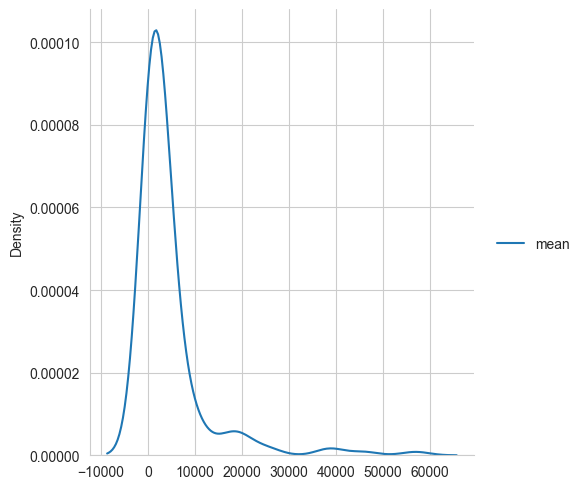

In [144]:
sns.displot(customer_snapshot['total'],
    hue=None,
    weights=None,
    kind='kde',
    legend=True,
    color='deepskyblue',
    height=5,
    aspect=1)

### Periodicity of each customer

In [145]:
#Periodicity of customer order 
customer_orders = df.groupby(['name_o', 'year', 'month', 'weekday']).agg({
    'sales_order_id_o': 'nunique',
    'date': ['min', 'max']
})

In [146]:
# hide_code_in_slideshow()
#search for specific customer
customer_names = customer_orders.index.get_level_values(0).unique()
pd.options.display.max_rows = len(customer_names)
HTML(customer_names.to_frame().to_html(index=False))

In [147]:
from ipywidgets import widgets
from IPython.display import display
# create a text input widget
text_box = widgets.Text(
    value='',
    placeholder='Enter a customer name',
    description='Customer name:',
    disabled=False
)

display(text_box)
user_input = text_box.value

# Display the user's input
print(f'for customer, {user_input}...')

Text(value='', description='Customer name:', placeholder='Enter a customer name')

for customer, ...


In [148]:
customer_name = input()

 ABAAD ALJEEL DBA LIKE4CARD


In [149]:
print("Please enter a customer name: ",customer_name)

Please enter a customer name:  ABAAD ALJEEL DBA LIKE4CARD


In [150]:
# hide_code_in_slideshow()
#prompt
customer_name = input("Please enter a customer name: ")
#customer_name= "Global Deal d.o.o"

Please enter a customer name:  ABAAD ALJEEL DBA LIKE4CARD


When does he usually order?

In [151]:
customer_orders.loc[customer_name]

sales_order_id_o       date           
                                nunique        min        max
year   month weekday                                         
2019.0 1.0   Friday                   0 2019-01-04 2019-01-18
             Monday                   0 2019-01-07 2019-01-28
             Thursday                 0 2019-01-03 2019-01-17
             Tuesday                  0 2019-01-08 2019-01-08
             Wednesday                0 2019-01-16 2019-01-16
       2.0   Tuesday                  0 2019-02-26 2019-02-26
             Wednesday                0 2019-02-20 2019-02-20
       3.0   Friday                   0 2019-03-22 2019-03-22
             Thursday                 0 2019-03-21 2019-03-21
             Wednesday                0 2019-03-27 2019-03-27
       4.0   Friday                   0 2019-04-26 2019-04-26
             Thursday                 0 2019-04-11 2019-04-11
             Tuesday                  0 2019-04-02 2019-04-02
       5.0   Friday                   0 2019-05-03 2019-05-03
             Thursday                 0 2019-05-09 2019-05-23
             Wednesday                0 2019-05-01 2019-05-22
       6.0   Friday                   0 2019-06-07 2019-06-14
             Monday                   0 2019-06-10 2019-06-10
             Thursday                 0 2019-06-13 2019-06-27
             Wednesday                0 2019-06-05 2019-06-26
       7.0   Monday                   0 2019-07-08 2019-07-08
             Tuesday                  0 2019-07-02 2019-07-02
             Wednesday                0 2019-07-10 2019-07-24
       8.0   Friday                   0 2019-08-02 2019-08-23
             Tuesday                  0 2019-08-06 2019-08-06
       9.0   Friday                   0 2019-09-20 2019-09-20
             Monday                   0 2019-09-16 2019-09-30
             Thursday                 0 2019-09-12 2019-09-12
             Tuesday                  0 2019-09-03 2019-09-24
       10.0  Wednesday                0 2019-10-02 2019-10-02
       11.0  Friday                   0 2019-11-29 2019-11-29
             Monday                   0 2019-11-04 2019-11-25
       12.0  Friday                   0 2019-12-20 2019-12-20
             Monday                   0 2019-12-02 2019-12-30
             Thursday                 0 2019-12-19 2019-12-19
             Wednesday                0 2019-12-11 2019-12-11
2020.0 1.0   Friday                   0 2020-01-17 2020-01-17
             Monday                   0 2020-01-06 2020-01-06
             Thursday                 0 2020-01-09 2020-01-30
             Wednesday                0 2020-01-08 2020-01-08
       2.0   Friday                   0 2020-02-14 2020-02-14
             Thursday                 0 2020-02-06 2020-02-06
             Wednesday                0 2020-02-19 2020-02-26
       3.0   Friday                   0 2020-03-13 2020-03-13
             Monday                   0 2020-03-02 2020-03-30
             Tuesday                  0 2020-03-10 2020-03-31
             Wednesday                0 2020-03-04 2020-03-18
       4.0   Monday                   0 2020-04-06 2020-04-27
             Thursday                 0 2020-04-02 2020-04-16
             Tuesday                  0 2020-04-07 2020-04-07
             Wednesday                0 2020-04-22 2020-04-29
       5.0   Friday                   0 2020-05-08 2020-05-08
             Monday                   0 2020-05-04 2020-05-18
             Thursday                 0 2020-05-14 2020-05-28
             Tuesday                  0 2020-05-12 2020-05-26
             Wednesday                0 2020-05-27 2020-05-27
       6.0   Friday                   0 2020-06-26 2020-06-26
             Monday                   0 2020-06-01 2020-06-29
             Thursday                 0 2020-06-11 2020-06-18
             Tuesday                  0 2020-06-02 2020-06-09
             Wednesday                0 2020-06-17 2020-06-24
       7.0   Thursday                 0 2020-07-02 2020

In [152]:
customer_orders = customer_orders.reset_index()
customer_orders.columns = ['name_o', 'year', 'month', 'weekday', 'orders_count', 'first_order', 'last_order']

In [153]:
customer_orders[customer_orders['name_o']=='ABAAD ALJEEL DBA LIKE4CARD'].tail()

name_o    year  month    weekday  orders_count  \
214  ABAAD ALJEEL DBA LIKE4CARD  2023.0    2.0    Tuesday             2   
215  ABAAD ALJEEL DBA LIKE4CARD  2023.0    3.0     Monday             1   
216  ABAAD ALJEEL DBA LIKE4CARD  2023.0    3.0  Wednesday             1   
217  ABAAD ALJEEL DBA LIKE4CARD  2023.0    4.0     Monday             1   
218  ABAAD ALJEEL DBA LIKE4CARD  2023.0    4.0    Tuesday             1   

    first_order last_order  
214  2023-02-14 2023-02-21  
215  2023-03-13 2023-03-13  
216  2023-03-01 2023-03-01  
217  2023-04-03 2023-04-03  
218  2023-04-04 2023-04-04

In [154]:
#Periodicity by weekday month year
weekdays = customer_orders.groupby(['name_o', 'weekday']).agg({'orders_count': 'sum'})
months = customer_orders.groupby(['name_o', 'month']).agg({'orders_count': 'sum'})
years = customer_orders.groupby(['name_o', 'year']).agg({'orders_count': 'sum'})

In [155]:
weekdays.head(3)

orders_count
name_o       weekday               
24 Games ApS Friday              13
             Monday               6
             Thursday             7

In [156]:
months.loc[('ABAAD ALJEEL DBA LIKE4CARD')]

orders_count
month              
1.0               3
2.0               3
3.0               2
4.0               2
5.0               3
6.0               2
7.0               1
8.0               3
9.0               2
10.0              4
11.0              4
12.0              3

In [157]:
client_1 = years.loc[('Global Deal d.o.o')].reset_index()
client_1

year  orders_count
0  2019.0             0
1  2020.0             0
2  2021.0             0

In [158]:
fig, ax = plt.subplots()
size = 0.3

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.pie(x=client_1['orders_count'], labels=client_1['year'],radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(client_1['orders_count'], radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Global Deal d.o.o')
plt.show()

/usr/local/lib/python3.10/site-packages/matplotlib/axes/_axes.py:3162: RuntimeWarning:

invalid value encountered in divide



ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

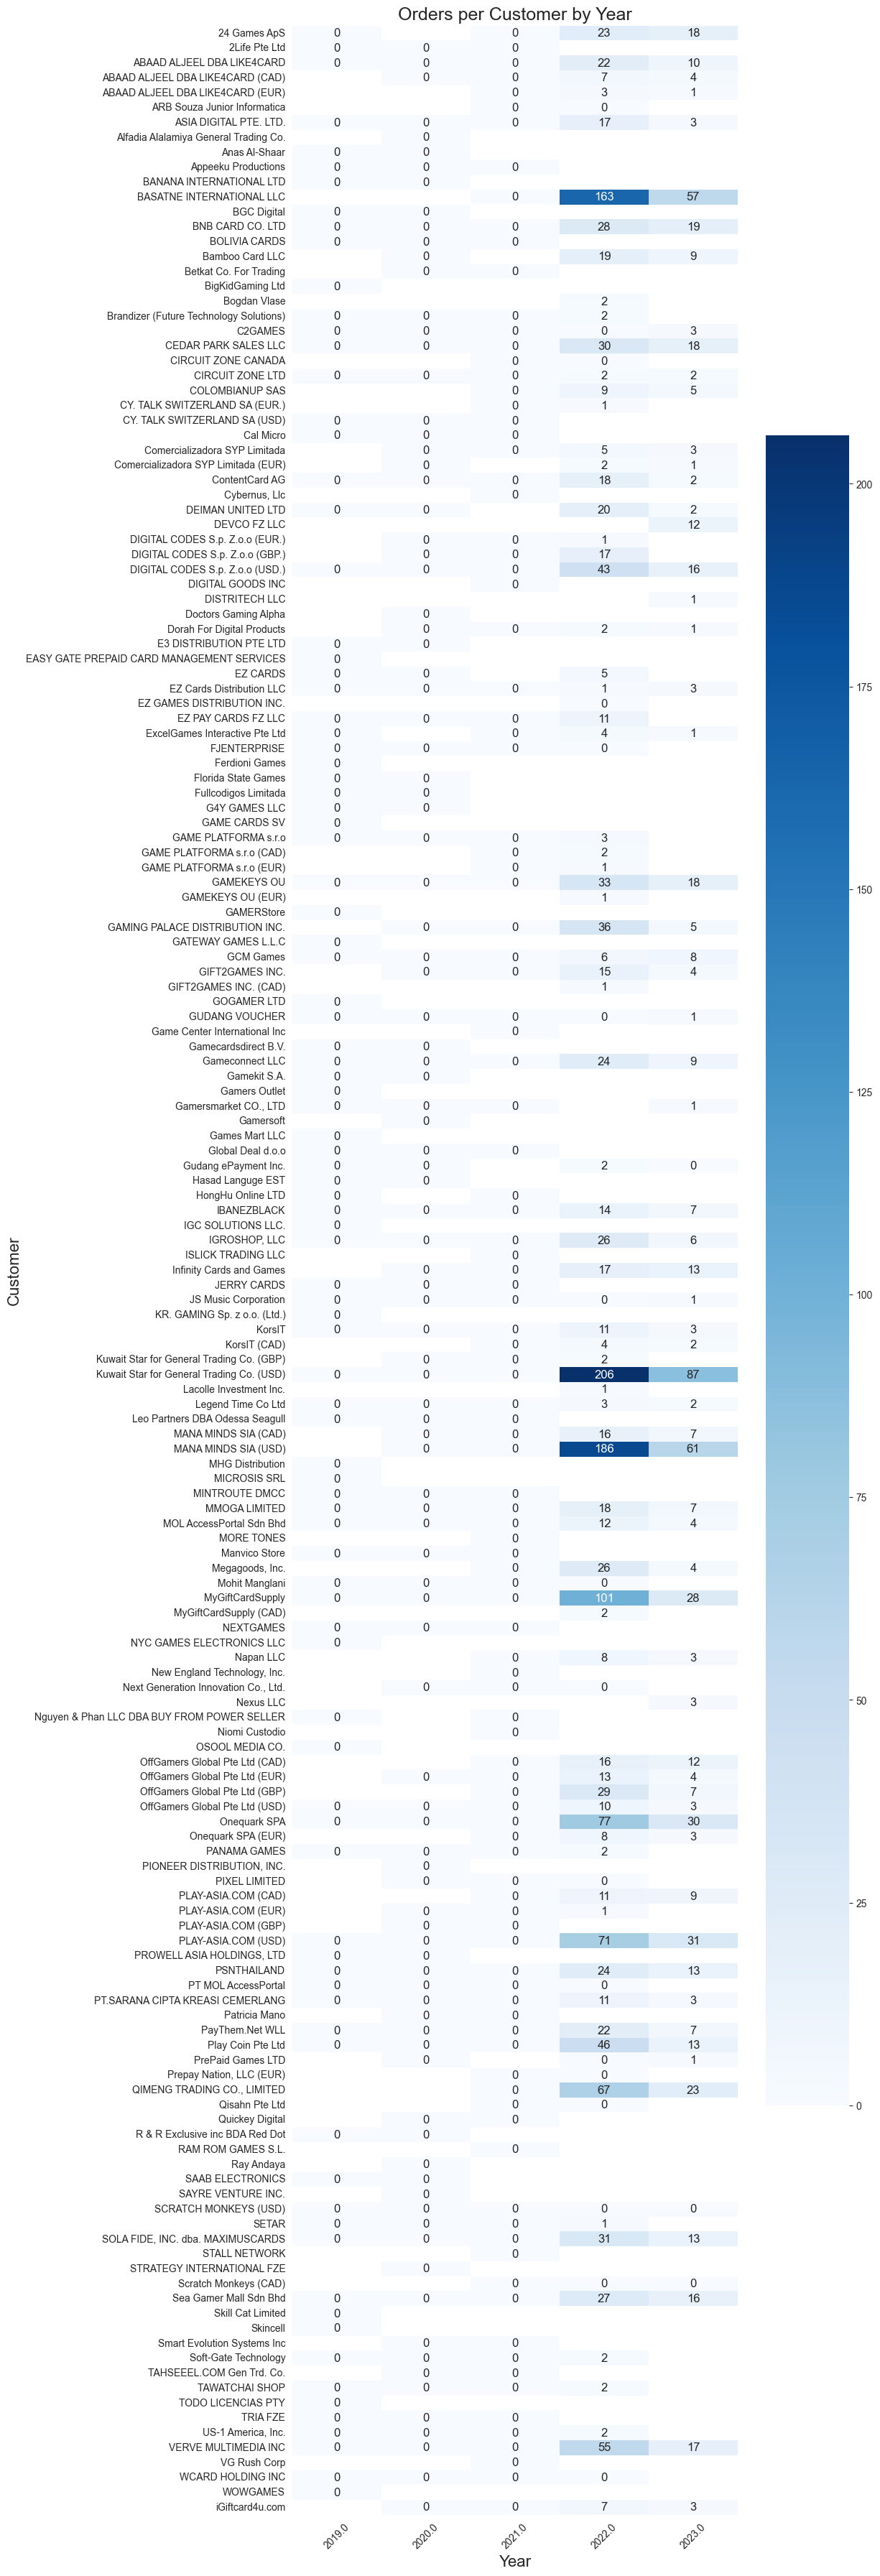

In [159]:
# hide_code_in_slideshow()
#Visu
year_pivot = years.pivot_table(index='name_o', columns='year', values='orders_count')

fig, ax = plt.subplots(figsize=(10, 45))
sns.heatmap(year_pivot, cmap='Blues', annot=True, fmt='g', ax=ax, annot_kws={"size": 12})
plt.title('Orders per Customer by Year', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Customer', fontsize=16)

fig.savefig('heatmap.png')

In [160]:
from IPython.display import IFrame
IFrame(src='./heatmap.png', width=800, height=600, scrolling=True)

In [ ]:
# go to the terminal and navigate to the directory where your Jupyter notebook is saved.
# cd Downloads/Python/Dashboard/

# Run the following command to convert your Jupyter notebook to a HTML presentation:
# jupyter-nbextension install rise --py --sys-prefix
# jupyter-nbextension enable rise --py --sys-prefix

# jupyter nbconvert Sales_DB.ipynb --to slides --post serve

In [ ]:
# jupyter nbconvert Sales_DB.ipynb --to slides --no-input --post serve

In [ ]:
# {
#  ...
#  "rise": {"scroll": true}
# }